# Potential Energy Surfaces

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
import json
import pandas as pd

import sys
sys.path.append("../src/")

import hessian
import system
import chl_xtb

$ q_{i} = \sqrt{\frac{m \omega_{i}}{\hbar}} \hat{x} $

$ [q_{i}] = \sqrt{\frac{kg 2 \pi s^{-1}}{\frac{J s}{2 \pi }}} m $

$ [q_{i}] = \sqrt{\frac{kg 2 \pi s^{-1}}{\frac{kg m^2 s^{-2} s}{2 \pi }}} m $

$ [q_{i}] = \sqrt{\frac{2 \pi}{\frac{m^2}{2 \pi }}} m $

$ [q_{i}] = \sqrt{\frac{4 \pi^2}{m^2}}m $

$ [q_{i}] = \frac{2 \pi}{m}m $

$ [q_{i}] = 2 \pi $

In [2]:
with open("../data/hessians/huang_rhys.json") as hr_json:
    res = json.load(hr_json)

In [3]:
res_pd = pd.DataFrame(res).T

dict_keys(['displacements', 'ground_energies', 'transition_energies', 'excited_energies', 'q_coords', 'g_min', 'e_min', 'hrf', 'wavenumber', 'frequency'])


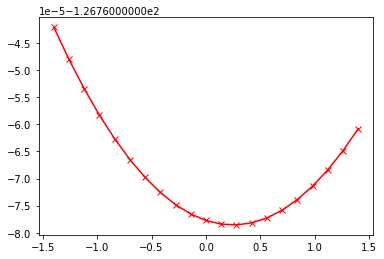

In [40]:
fig, ax = plt.subplots()

print(res["mode_3"].keys())

for mode in res.keys():
    
    g_min = np.argmin(res[mode]["ground_energies"])
    e_min = np.argmin(res[mode]["excited_energies"])
    
    diff = g_min - e_min
    
    if diff != 0:
        ax.plot(res[mode]["q_coords"], res[mode]["ground_energies"], color='black', marker='x')
        ax.plot(res[mode]["q_coords"], res[mode]["excited_energies"], color='red', marker='x')

        
        ax.vlines(res[mode]["q_coords"][g_min], ymin=min(res[mode]["ground_energies"]), ymax=max(res[mode]["excited_energies"]), color='black')
        ax.vlines(res[mode]["q_coords"][e_min], ymin=min(res[mode]["ground_energies"]), ymax=max(res[mode]["excited_energies"]), color='red')
        
        break

In [113]:
#pd.set_option('display.max_rows', 10)
res_pd = res_pd.sort_values("hrf", ascending=False)

for index, row in res_pd.iterrows():
    print(f"{index} : {np.min(row['q_coords']) <  row['g_min'] < np.max(row['q_coords'])}", end=", ")

mode_26 : True, mode_46 : False, mode_32 : True, mode_131 : True, mode_8 : True, mode_24 : True, mode_22 : True, mode_149 : True, mode_188 : True, mode_136 : True, mode_17 : True, mode_43 : False, mode_80 : False, mode_16 : True, mode_76 : True, mode_30 : False, mode_29 : True, mode_129 : True, mode_79 : True, mode_82 : True, mode_155 : True, mode_58 : True, mode_51 : False, mode_93 : True, mode_10 : True, mode_28 : True, mode_2 : True, mode_36 : False, mode_4 : False, mode_5 : True, mode_154 : True, mode_134 : True, mode_49 : False, mode_139 : True, mode_12 : False, mode_137 : True, mode_33 : True, mode_144 : True, mode_23 : True, mode_150 : True, mode_81 : True, mode_125 : True, mode_56 : True, mode_7 : True, mode_52 : True, mode_143 : True, mode_9 : True, mode_11 : True, mode_50 : True, mode_38 : False, mode_39 : False, mode_41 : True, mode_84 : True, mode_100 : True, mode_145 : True, mode_141 : True, mode_1 : True, mode_42 : True, mode_70 : True, mode_123 : True, mode_62 : True, mo